import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


read the data
/decribe the data

In [8]:
student.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualization[EDA]


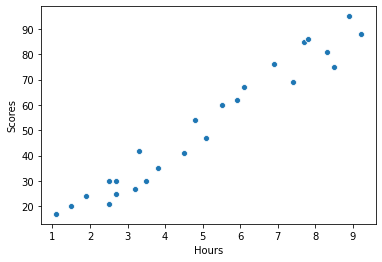

In [61]:
sns.scatterplot(x='Hours',y='Scores',data=student)

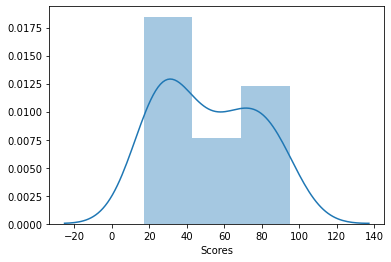

In [62]:
# sns.distplot(student['Hours'])
sns.distplot(student['Scores'])

In [63]:
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


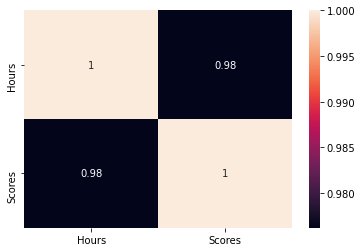

In [64]:
sns.heatmap(student.corr(),annot=True)

In [27]:
student.columns

Index(['Hours', 'Scores'], dtype='object')

Train and split 

In [28]:
X = student[['Hours']]
y = student[['Scores']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=102)

creating and training model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

Linear Regression-Coefficient

In [57]:
print("Accuracy of Training LR -",lm.score(X_train, y_train)*100)
print("Accuracy of Testing LR - ",lm.score(X_test, y_test)*100)

Accuracy of Training LR - 96.11478872138409
Accuracy of Testing LR -  92.10048264474521


In [60]:
print('Percentage Prediction for corresponding hours entered:-',lm.predict([[5.5]]))
print('Percentage Prediction for corresponding hours entered:-',lm.predict([[8.7]]))
print('Percentage Prediction for corresponding hours entered:-',lm.predict([[9.25]]))

Percentage Prediction for corresponding hours entered:- [[57.68236417]]
Percentage Prediction for corresponding hours entered:- [[90.42527583]]
Percentage Prediction for corresponding hours entered:- [[96.05296377]]


In [58]:
lm.coef_

array([[10.23215989]])

In [35]:
X_train.columns

Index(['Hours'], dtype='object')

In [36]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [37]:
cdf

,Coeff
Hours,10.23216


In [67]:
pred = lm.predict(X_test)

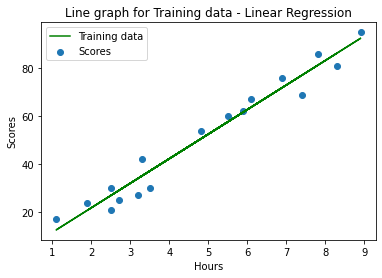

In [54]:
plt.scatter(X_train,y_train,label='Scores')
plt.plot(X_train,lm.predict(X_train),color='green', label='Training data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Line graph for Training data - Linear Regression')
plt.legend()
plt.show()

Resdiual Histogram

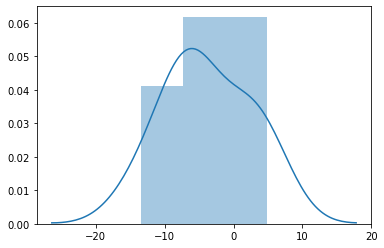

In [42]:
sns.distplot((y_test-pred))